# **`Early Wildfire Detection`**

Deteksi awal kebakaran hutan dapat dilakukan salah satunya adalah dengan `Object Detection`. Object amatan yang digunakan pada project ini adalah image dari asap/smoke yang diambil melalui camera pemantau tower hutan lindung. 

Selain melakukan pendeteksian awal asap, akan dilakukan juga perbandingan performa deteksi dengan menggunakan metode `YOLO` dan dibandingkan dengan penggabungan `YOLO + SAHI`. 

## **`Libraries`**

In [1]:
# import YOLO and SAHI Libraries
from ultralytics import YOLO
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.predict import get_prediction, get_sliced_prediction, predict

# import utilization
import os
import cv2
from pathlib import Path
from IPython.display import display, Image as IPImage
from PIL import Image
import matplotlib.pyplot as plt 
from matplotlib.image import imread

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **`A. YOLO - Object Detection`**

In [2]:
# path to data.yaml
dataset = r'Dataset\data.yaml'

# load model
model_nano = YOLO('yolov8n.yaml').load('yolov8n.pt')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

### **1. Train The Model**

In [3]:
# train with pretrained model nano

'''
Model already trained using below configuration and arguments:

model_nano.train(data=dataset,
                 epochs=50,
                 patience=10,
                 imgsz=256,
                 batch=32,
                 save=True,
                 workers=0,
                 optimizer='Adam',
                 exist_ok=True,
                 resume=True,
                 project='Train Model',
                 name='Nano_Train')
'''

"\nModel already trained using below configuration and arguments:\n\nmodel_nano.train(data=dataset,\n                 epochs=50,\n                 patience=10,\n                 imgsz=256,\n                 batch=32,\n                 save=True,\n                 workers=0,\n                 optimizer='Adam',\n                 exist_ok=True,\n                 resume=True,\n                 project='Train Model',\n                 name='Nano_Train')\n"

### **2. Validate The Model**

In [4]:
# load a model
custom_model = YOLO(r'Train Model\Nano_Train\weights\best.pt')

# validate the model
metrics = custom_model.val(data=dataset,
                           imgsz=256,
                           batch=32,
                           half=False)

Ultralytics YOLOv8.1.1 🚀 Python-3.11.7 torch-2.1.2+cpu CPU (AMD A8-6410 APU with AMD Radeon R5 Graphics)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\yolov8\Wildfire_Detection\Wildfire_Detection\Dataset\valid\labels.cache... 147 images, 0 backgrounds, 0 corrupt: 100%|██████████| 147/147 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:23<00:00,  4.76s/it]


                   all        147        147      0.802      0.816      0.857      0.472
Speed: 1.7ms preprocess, 125.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\val


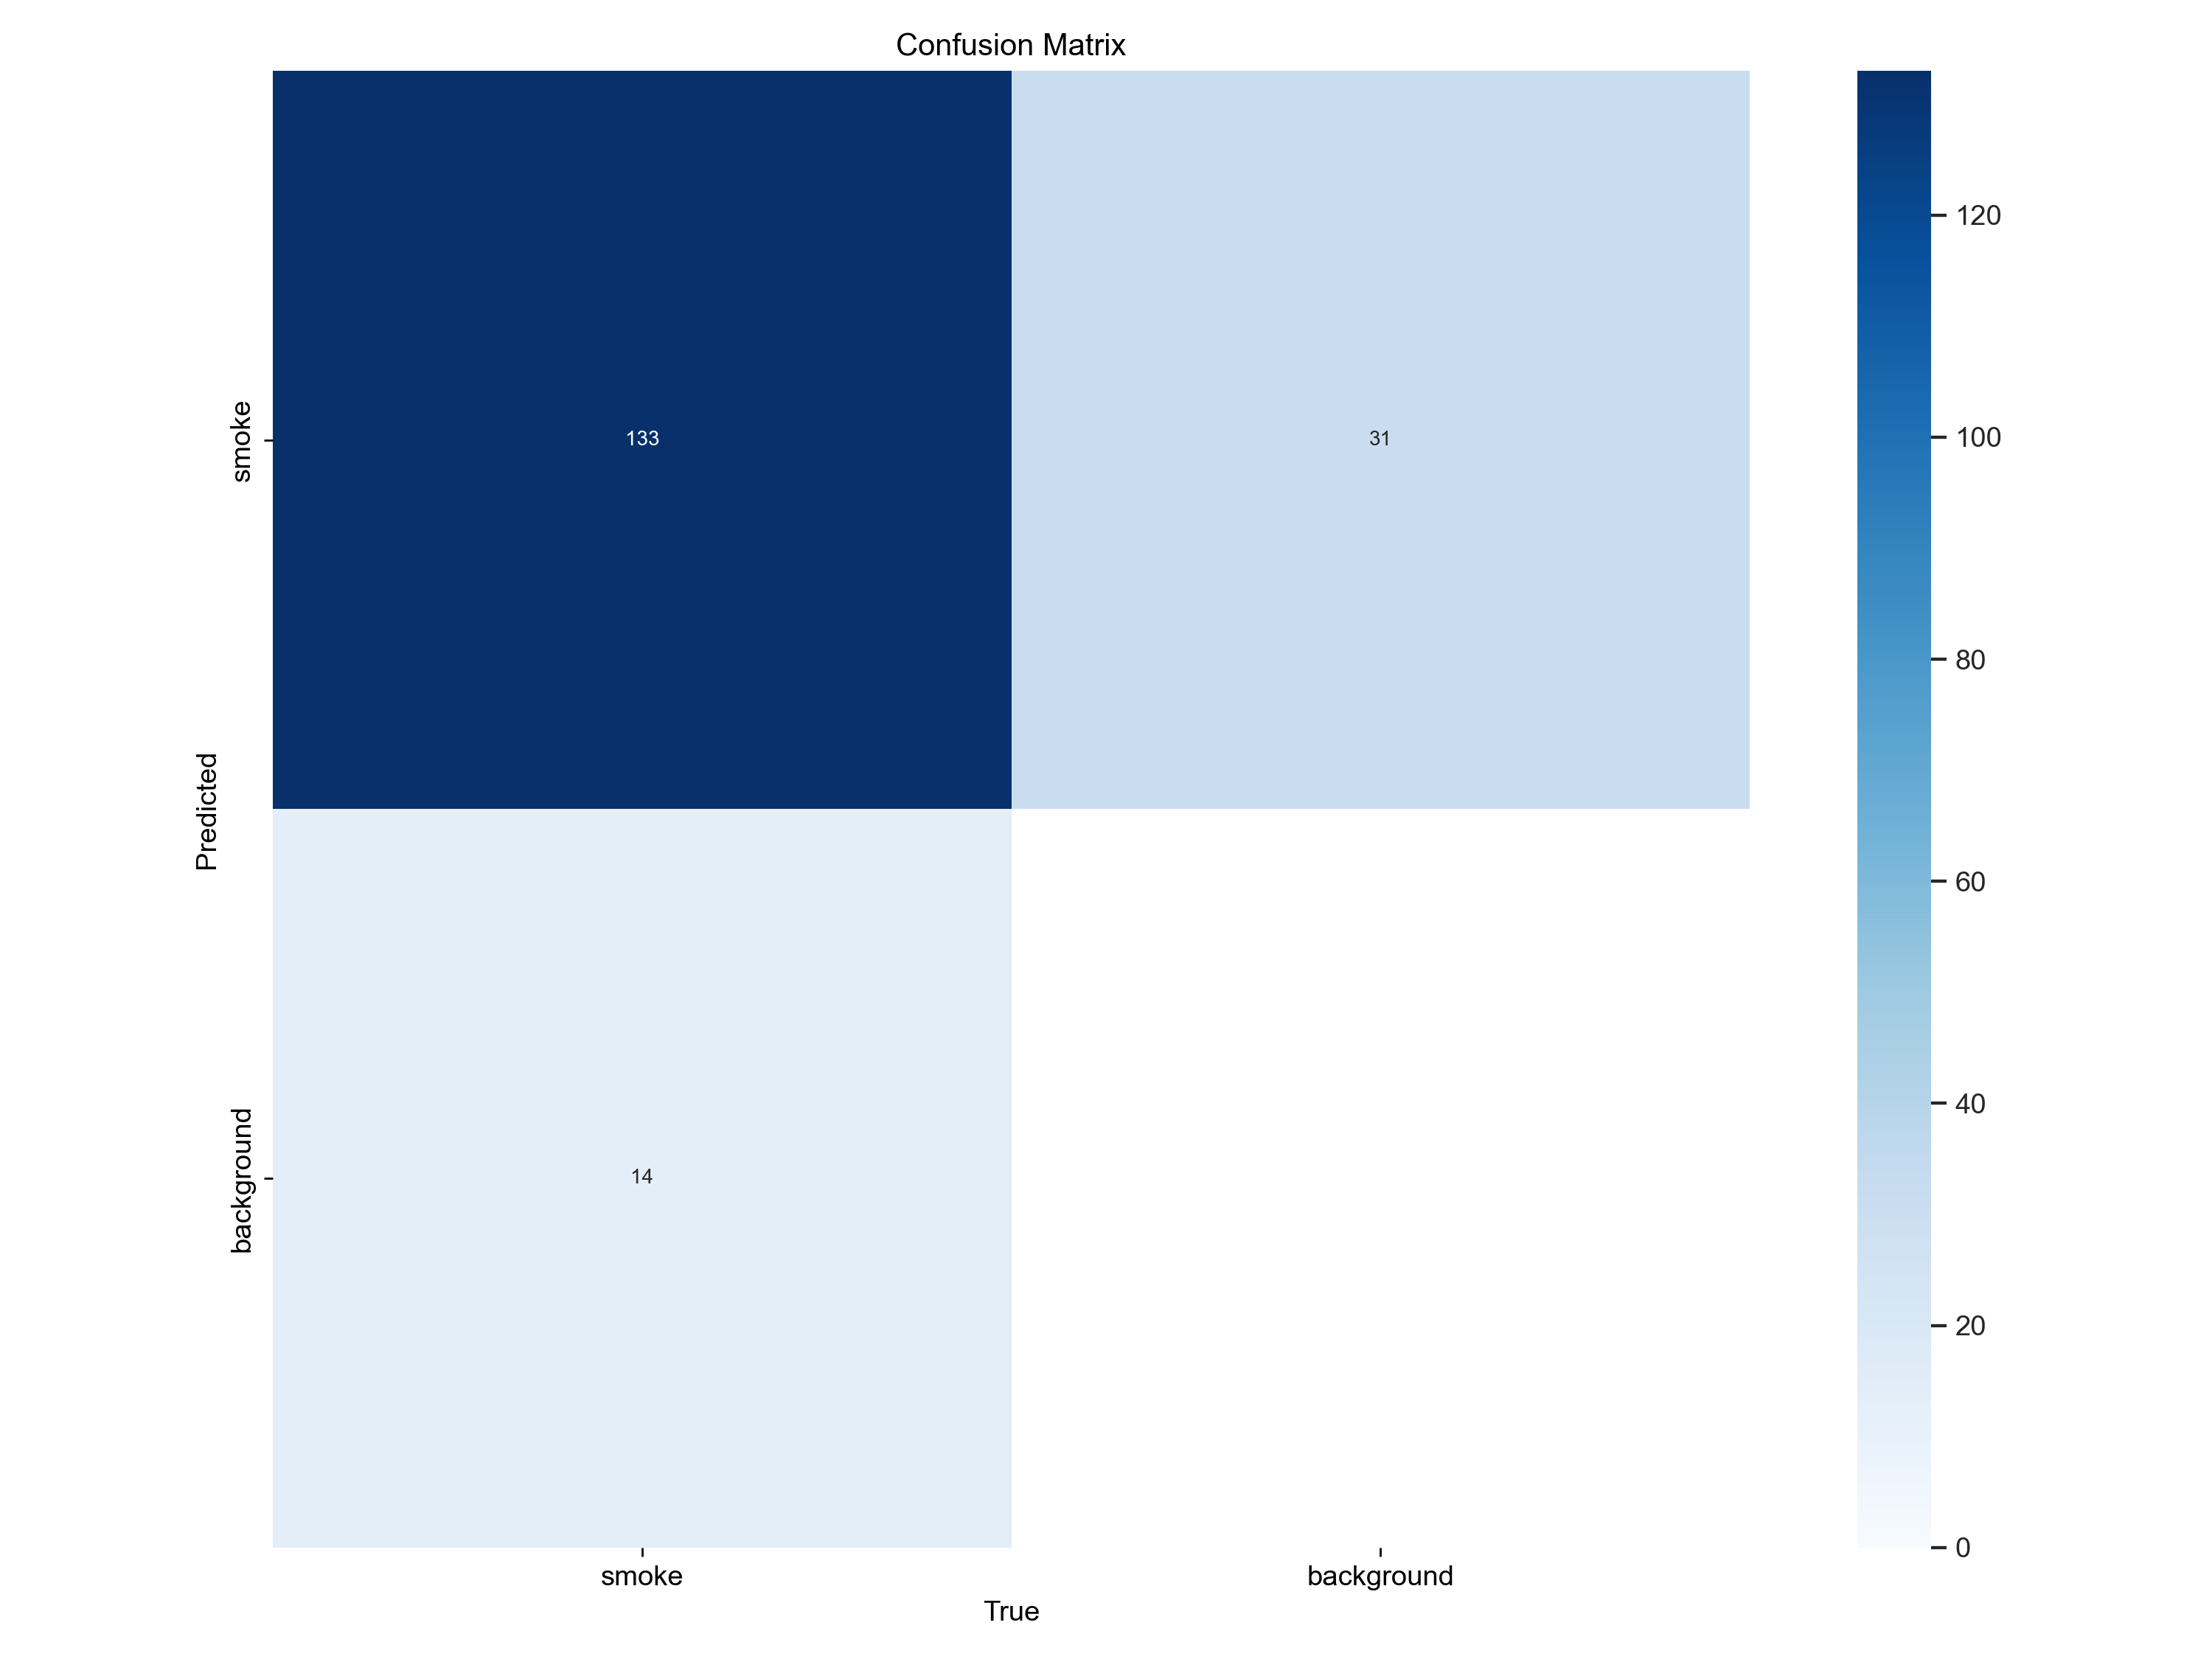

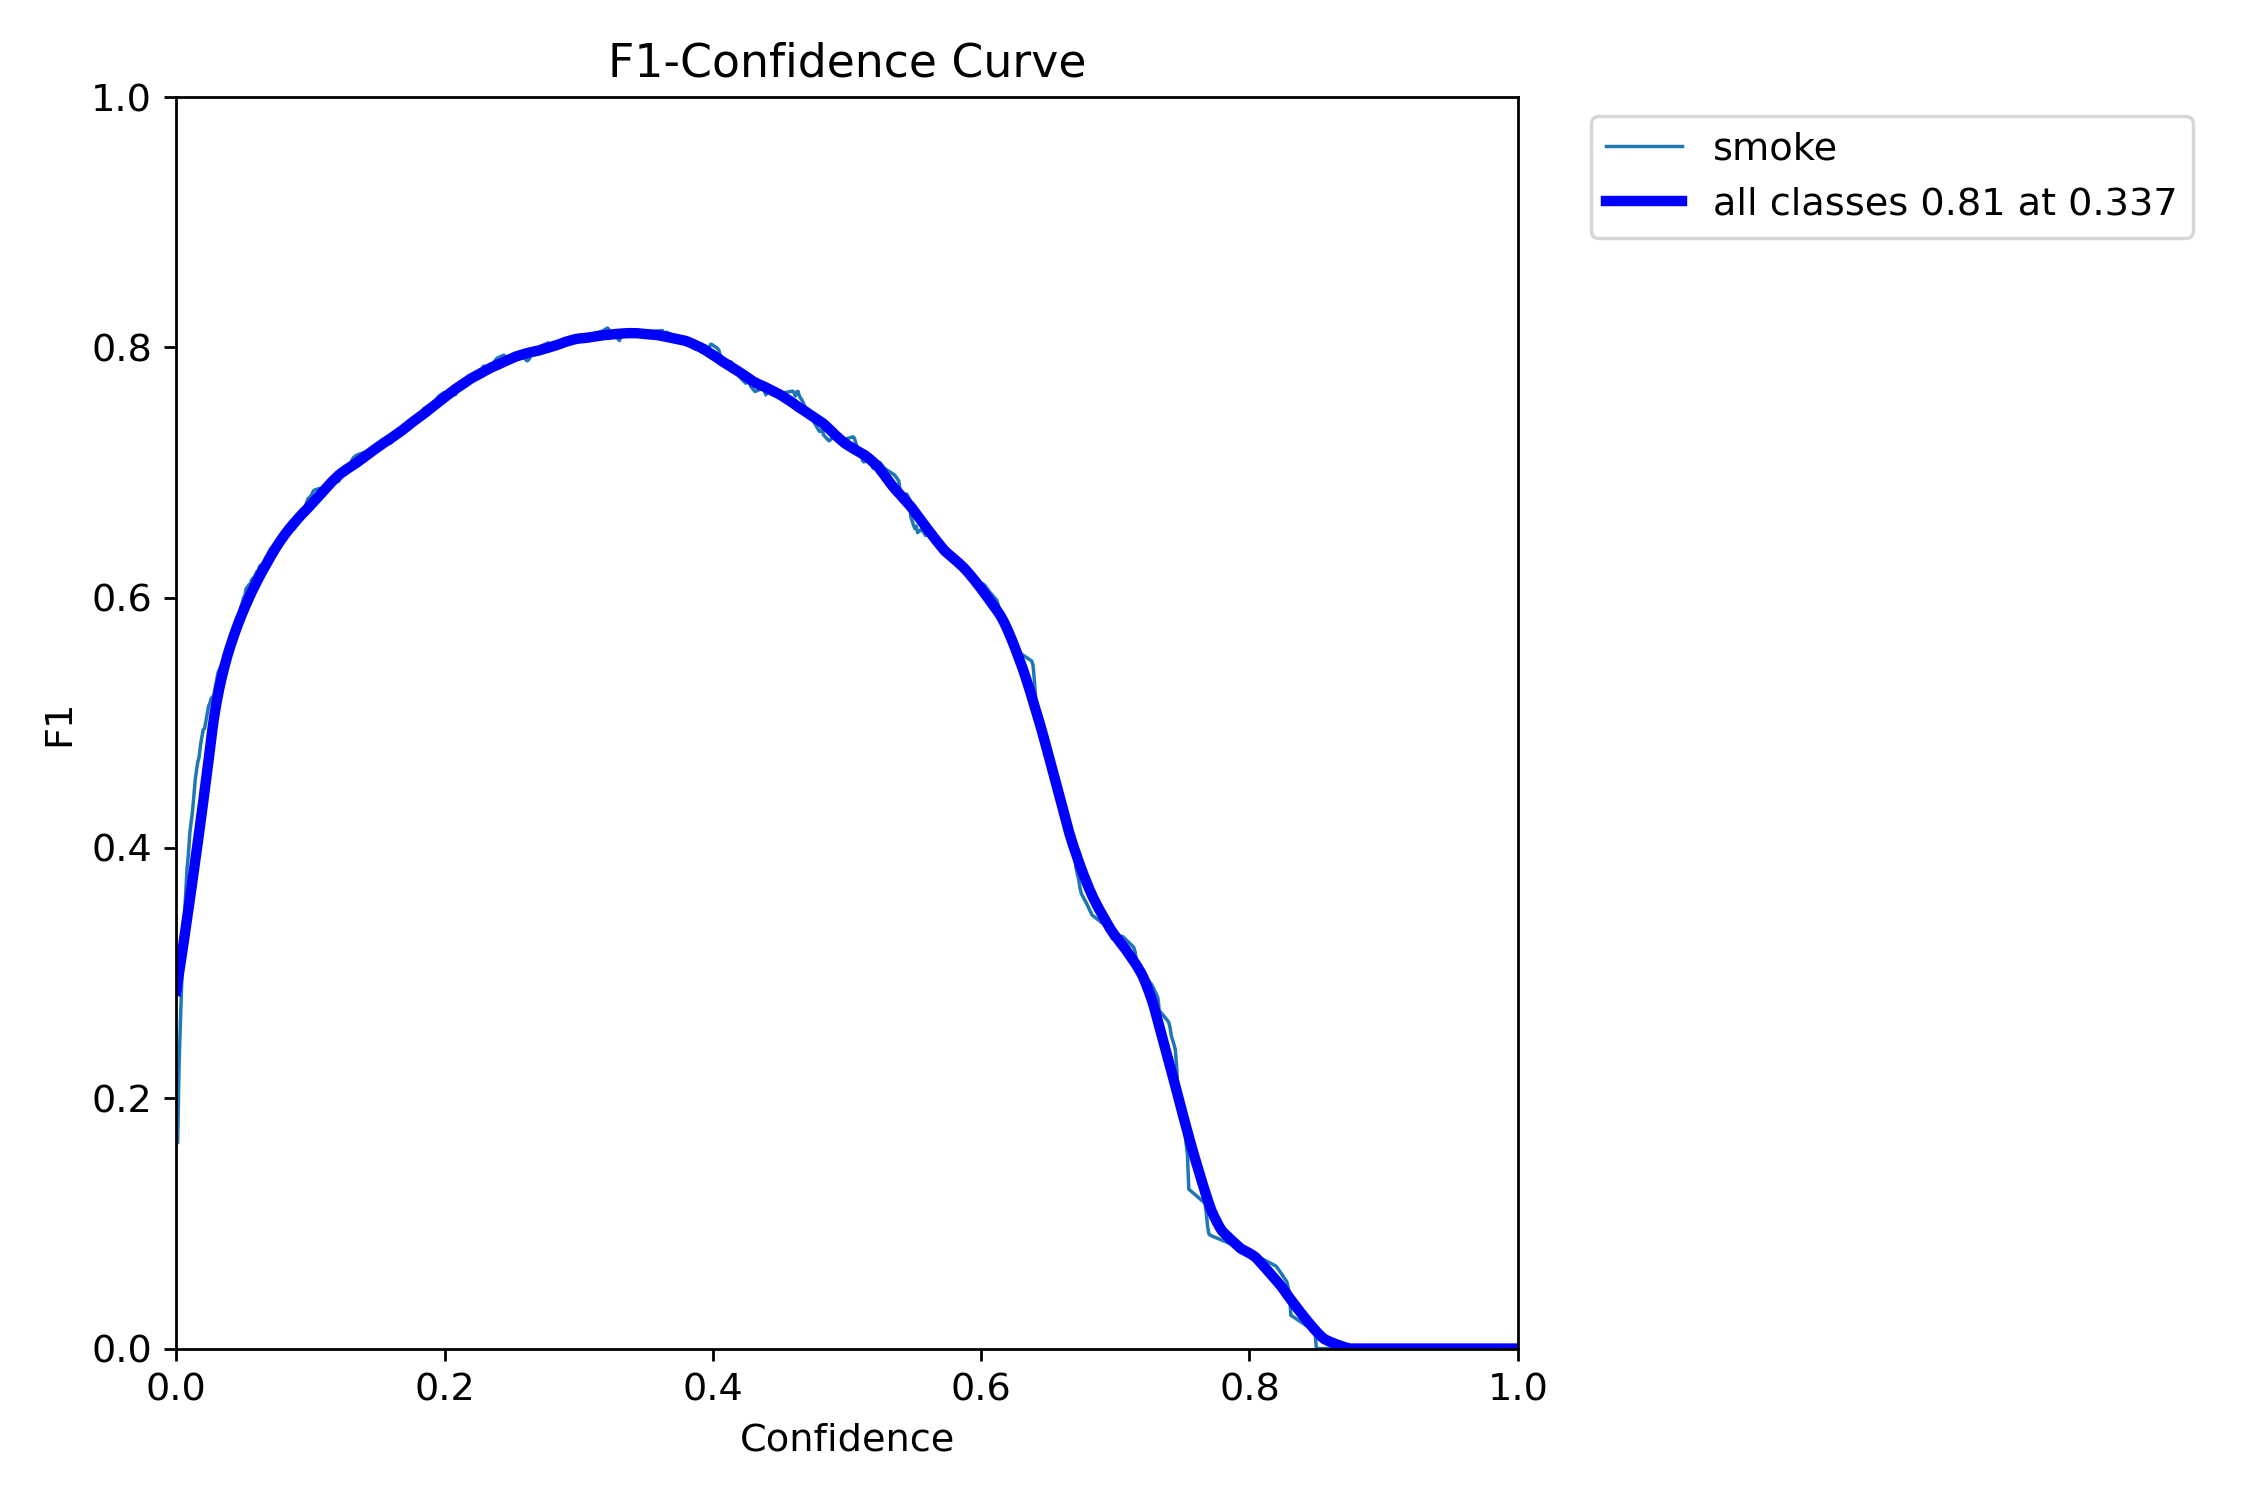

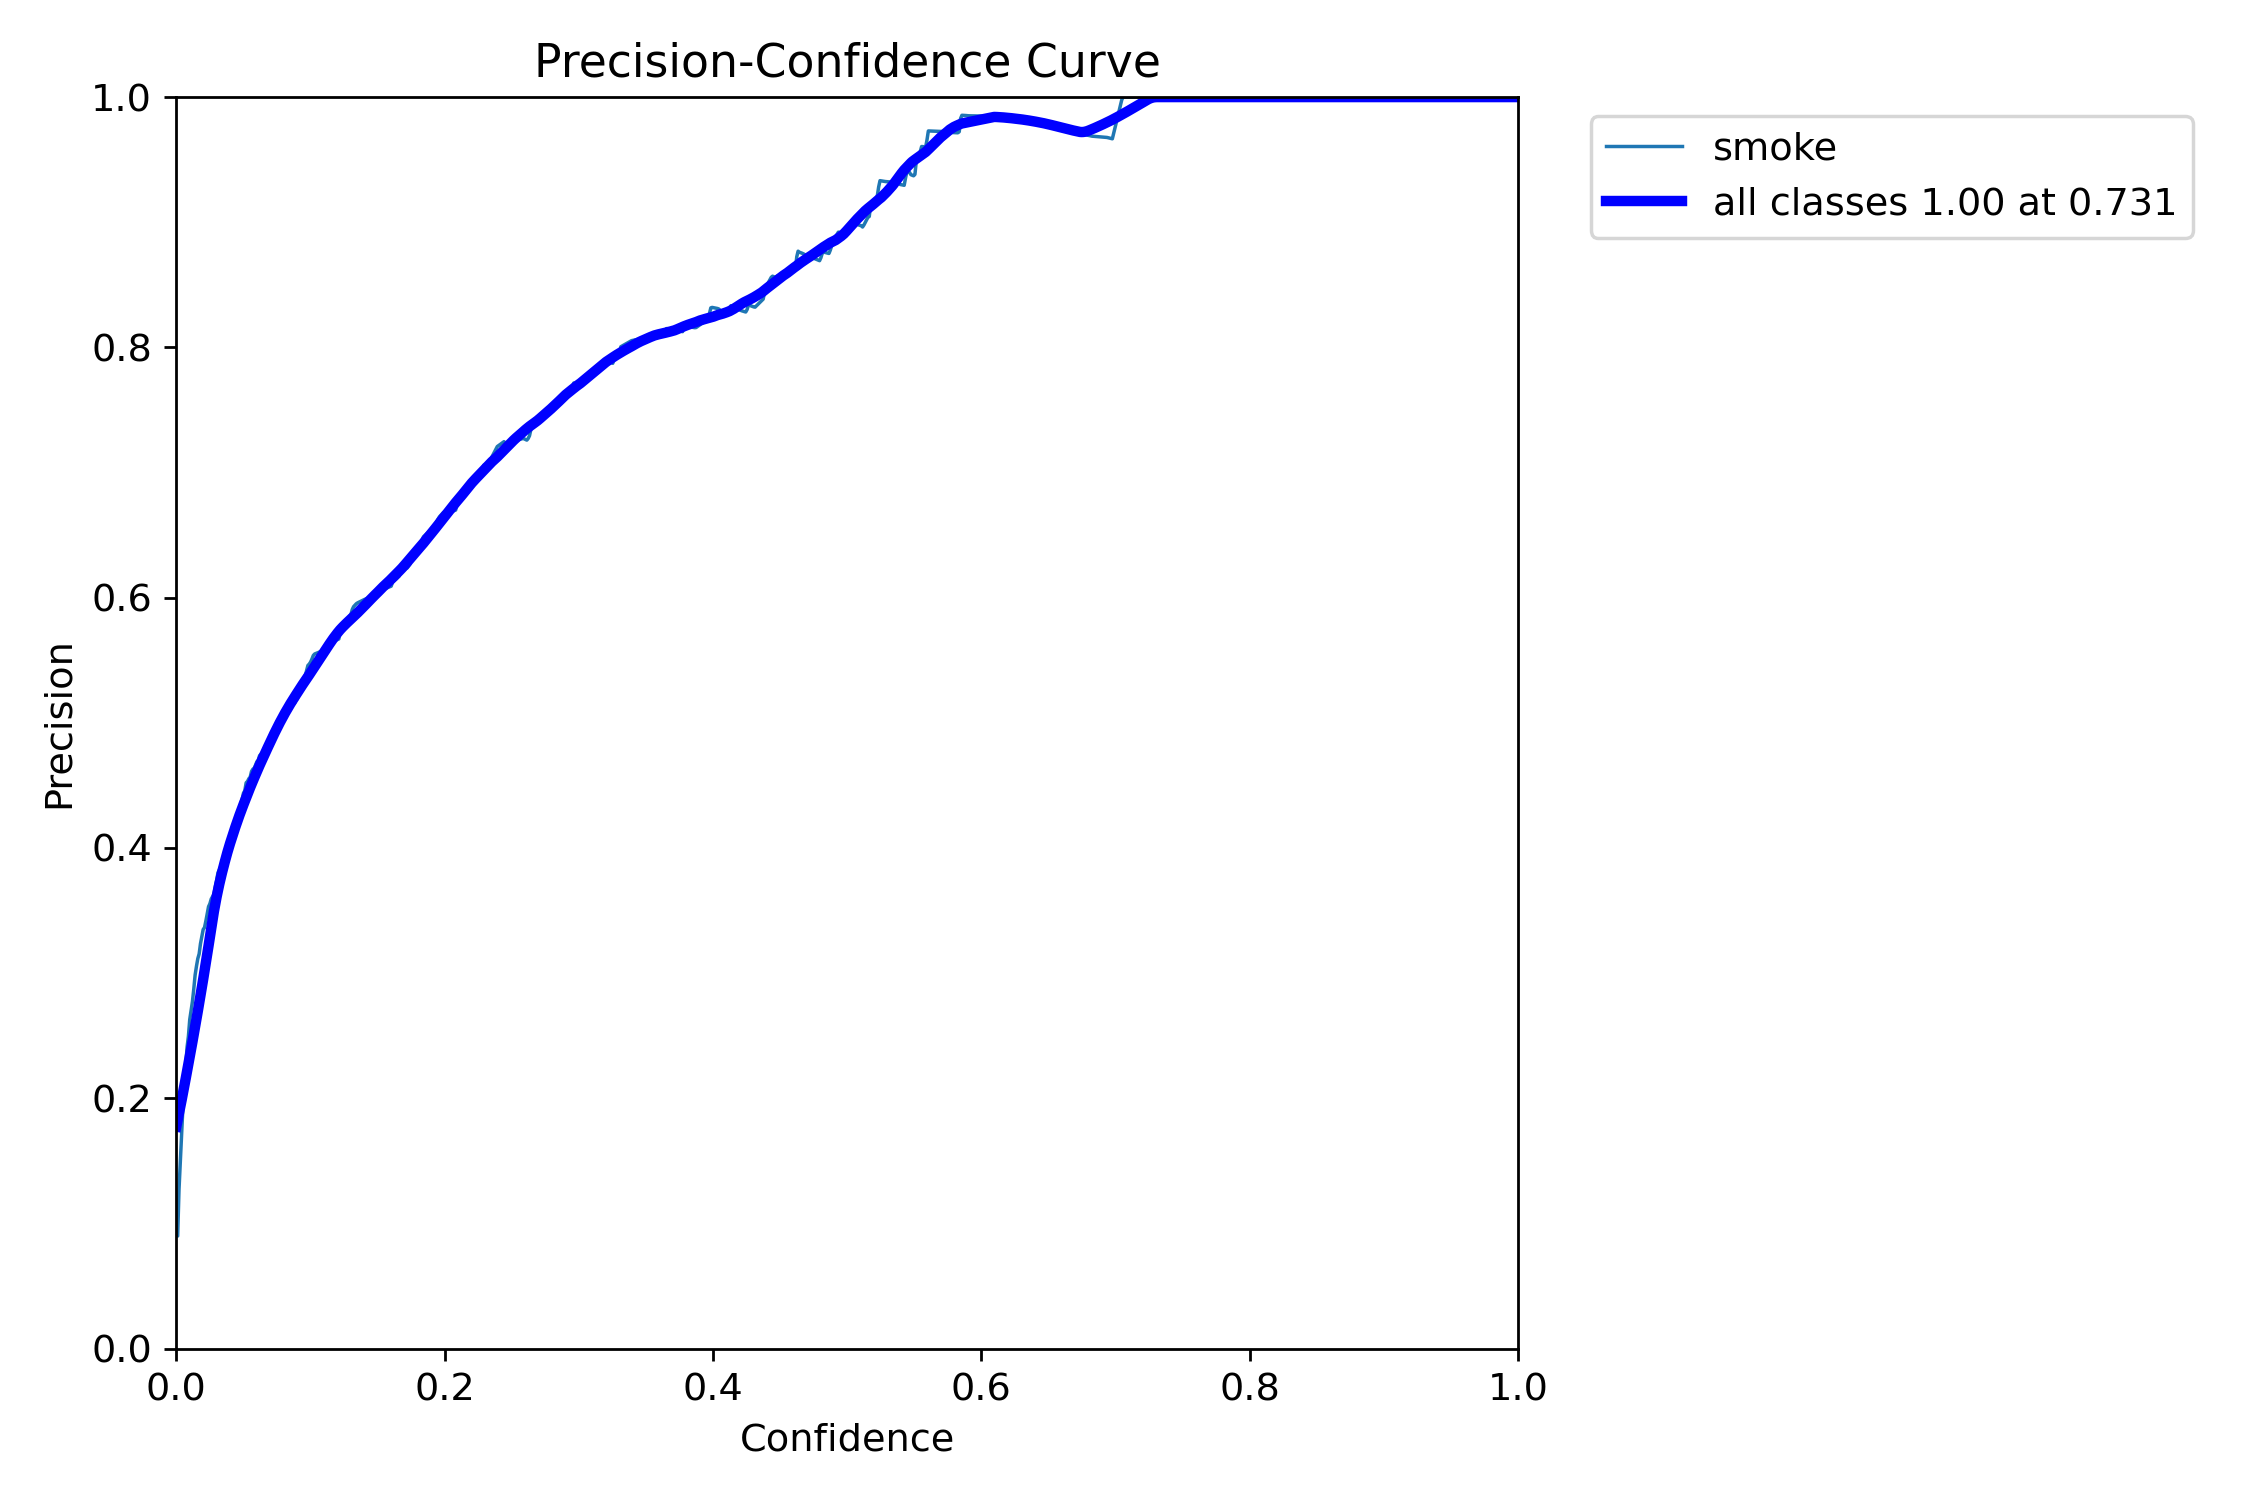

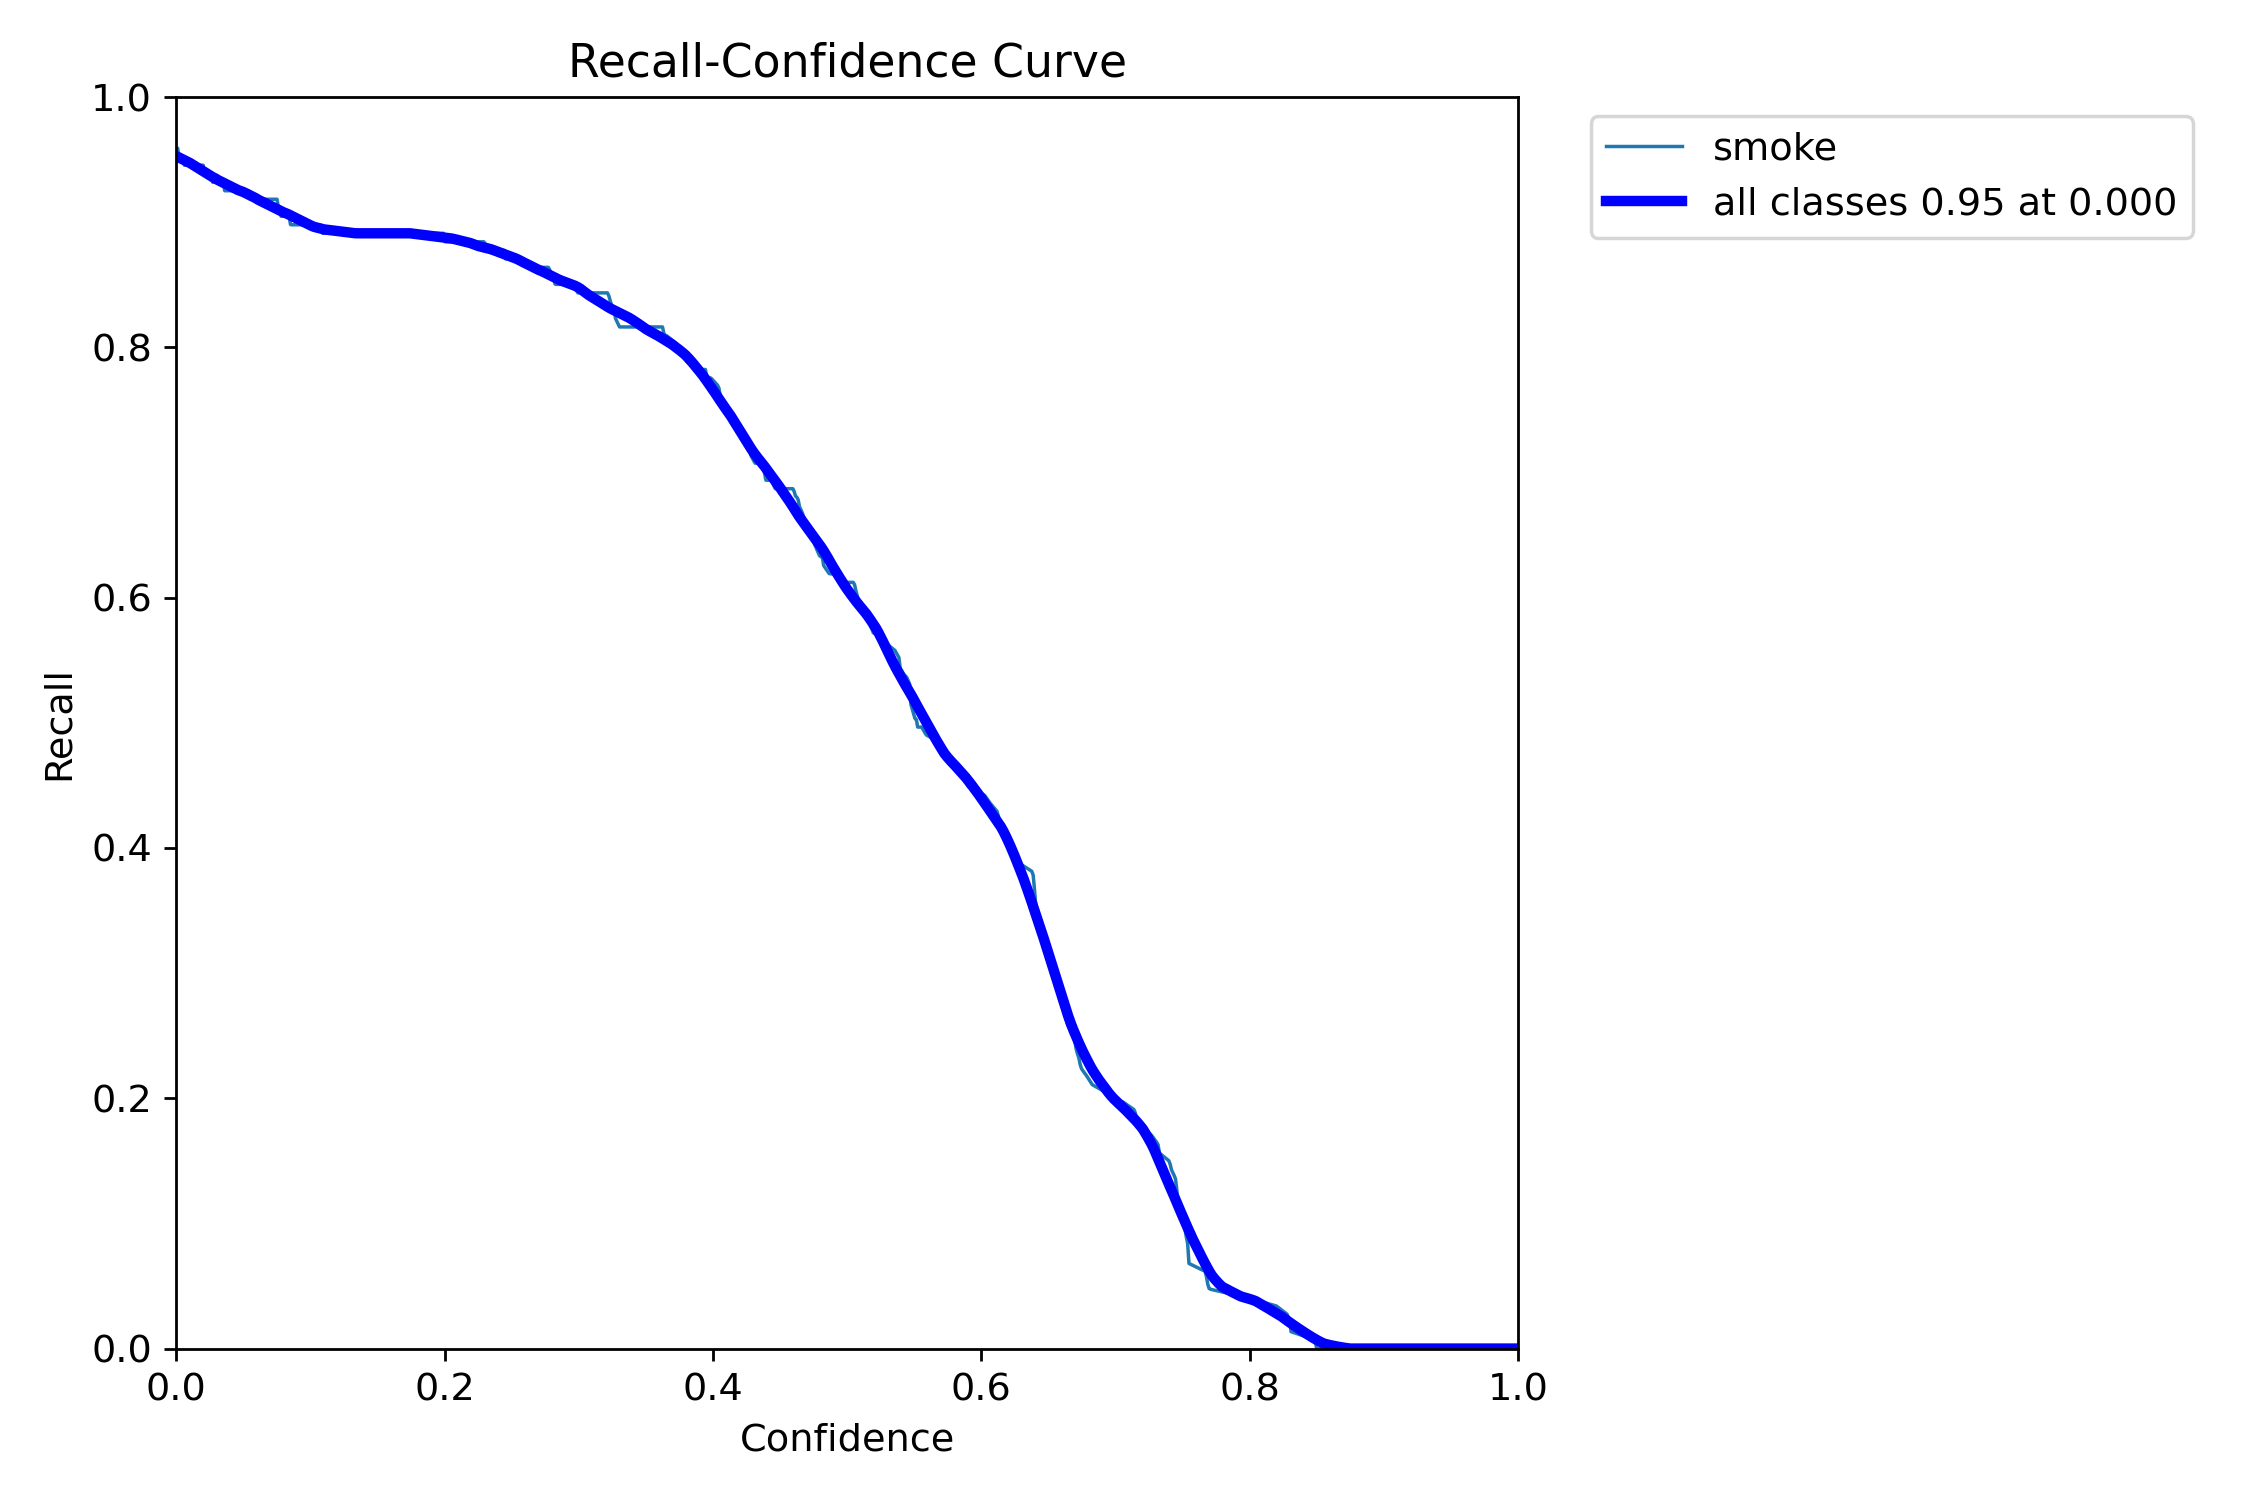

<Figure size 1400x1300 with 4 Axes>

In [5]:
# set the number of rows and columns in subplot
rows = 2
columns = 2

# create subplot
fig, axes = plt.subplots(rows, columns, figsize=(14, 13))

image_files = [r'runs\detect\val\confusion_matrix.png',
               r'runs\detect\val\F1_curve.png',
               r'runs\detect\val\P_curve.png',
               r'runs\detect\val\R_curve.png'
               ]

for i, image_file in enumerate(image_files):
    img = IPImage(filename = image_file)
    display(img)
    
plt.show()

### **3. Inference**

In [6]:
# path to test images
test_images_path = r'Dataset\test\images'

# get list in test_image_folder
list_images = [os.path.join(test_images_path, f) for f in os.listdir(test_images_path) if f.endswith(('.jpg','.jpeg','.png'))]


# Run batched inference on a list of images
results = custom_model(list_images, 
                imgsz=256, 
                conf=0.5,
                save=True,
                )



0: 192x256 (no detections), 1: 192x256 1 smoke, 2: 192x256 1 smoke, 3: 192x256 1 smoke, 4: 192x256 1 smoke, 5: 192x256 (no detections), 6: 192x256 1 smoke, 7: 192x256 1 smoke, 8: 192x256 1 smoke, 9: 192x256 (no detections), 10: 192x256 (no detections), 11: 192x256 1 smoke, 12: 192x256 2 smokes, 13: 192x256 (no detections), 14: 192x256 (no detections), 15: 192x256 (no detections), 16: 192x256 1 smoke, 17: 192x256 1 smoke, 18: 192x256 (no detections), 19: 192x256 1 smoke, 20: 192x256 1 smoke, 21: 192x256 1 smoke, 22: 192x256 1 smoke, 23: 192x256 1 smoke, 24: 192x256 (no detections), 25: 192x256 1 smoke, 26: 192x256 (no detections), 27: 192x256 1 smoke, 28: 192x256 2 smokes, 29: 192x256 1 smoke, 30: 192x256 1 smoke, 31: 192x256 1 smoke, 32: 192x256 1 smoke, 33: 192x256 1 smoke, 34: 192x256 1 smoke, 35: 192x256 1 smoke, 36: 192x256 (no detections), 37: 192x256 2 smokes, 38: 192x256 1 smoke, 39: 192x256 1 smoke, 40: 192x256 1 smoke, 41: 192x256 1 smoke, 42: 192x256 1 smoke, 43: 192x256 1 s

In [11]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images_in_subplots(images_path, num_columns=3):
    # Get the list of image files
    image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    if not image_files:
        print('No image files found.')
        return

    num_images = len(image_files)
    num_rows = (num_images // num_columns) + (num_images % num_columns > 0)

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

    # Handle the case where there is only one row or one column
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    if num_columns == 1:
        axes = axes.reshape(-1, 1)

    for i, image_name in enumerate(image_files):
        image_path = os.path.join(images_path, image_name)
        img = cv2.imread(image_path)[...,::-1]  # Read image in BGR format, convert to RGB

        # Get index for rows and columns
        row = i // num_columns
        col = i % num_columns

        # Display image on subplots
        axes[row, col].imshow(img)
        axes[row, col].axis('off')
        axes[row, col].set_title(image_name)

    # Hide any remaining empty subplots
    for j in range(num_images, num_rows * num_columns):
        axes.flatten()[j].axis('off')
        axes.flatten()[j].get_xaxis().set_visible(False)
        axes.flatten()[j].get_yaxis().set_visible(False)

    # Adjust subplot layout
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    # Show the plot
    plt.show()

# Example usage
images_path = 'runs\detect\predict'
display_images_in_subplots(images_path, num_columns=3)


<Figure size 1500x12500 with 75 Axes>

## **`B. YOLO Detection + Sahi Inference`**

In [8]:
# use trained model from previous section
custom_model_path = r'Train Model\Nano_Train\weights\best.pt'

predict(
    model_type='yolov8',
    model_path=custom_model_path,
    model_device='cpu',
    model_confidence_threshold=0.5,
    source=test_images_path,
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2
)

There are 74 listed files in folder: images/


Performing inference on images:   0%|          | 0/74 [00:00<?, ?it/s]

Performing prediction on 9 number of slices.


Performing inference on images:   1%|▏         | 1/74 [00:03<04:01,  3.31s/it]

Prediction time is: 3214.71 ms
Performing prediction on 9 number of slices.


Performing inference on images:   3%|▎         | 2/74 [00:06<03:52,  3.23s/it]

Prediction time is: 3097.88 ms
Performing prediction on 9 number of slices.


Performing inference on images:   4%|▍         | 3/74 [00:08<03:21,  2.84s/it]

Prediction time is: 2311.58 ms
Performing prediction on 9 number of slices.


Performing inference on images:   5%|▌         | 4/74 [00:11<03:23,  2.91s/it]

Prediction time is: 2951.05 ms
Performing prediction on 9 number of slices.


Performing inference on images:   7%|▋         | 5/74 [00:14<03:08,  2.74s/it]

Prediction time is: 2371.11 ms
Performing prediction on 9 number of slices.


Performing inference on images:   8%|▊         | 6/74 [00:17<03:06,  2.74s/it]

Prediction time is: 2693.02 ms
Performing prediction on 9 number of slices.


Performing inference on images:   9%|▉         | 7/74 [00:19<03:03,  2.74s/it]

Prediction time is: 2649.25 ms
Performing prediction on 9 number of slices.


Performing inference on images:  11%|█         | 8/74 [00:23<03:14,  2.95s/it]

Prediction time is: 3304.41 ms
Performing prediction on 9 number of slices.


Performing inference on images:  12%|█▏        | 9/74 [00:26<03:15,  3.01s/it]

Prediction time is: 3037.59 ms
Performing prediction on 9 number of slices.


Performing inference on images:  14%|█▎        | 10/74 [00:29<03:25,  3.21s/it]

Prediction time is: 3594.30 ms
Performing prediction on 9 number of slices.


Performing inference on images:  15%|█▍        | 11/74 [00:32<03:11,  3.05s/it]

Prediction time is: 2622.42 ms
Performing prediction on 9 number of slices.


Performing inference on images:  16%|█▌        | 12/74 [00:36<03:22,  3.26s/it]

Prediction time is: 3702.92 ms
Performing prediction on 9 number of slices.


Performing inference on images:  18%|█▊        | 13/74 [00:39<03:10,  3.13s/it]

Prediction time is: 2742.16 ms
Performing prediction on 9 number of slices.


Performing inference on images:  19%|█▉        | 14/74 [00:41<03:00,  3.01s/it]

Prediction time is: 2662.04 ms
Performing prediction on 9 number of slices.


Performing inference on images:  20%|██        | 15/74 [00:43<02:39,  2.71s/it]

Prediction time is: 1947.61 ms
Performing prediction on 9 number of slices.


Performing inference on images:  22%|██▏       | 16/74 [00:47<02:42,  2.81s/it]

Prediction time is: 2979.39 ms
Performing prediction on 9 number of slices.


Performing inference on images:  23%|██▎       | 17/74 [00:49<02:35,  2.72s/it]

Prediction time is: 2471.54 ms
Performing prediction on 9 number of slices.


Performing inference on images:  24%|██▍       | 18/74 [00:52<02:30,  2.69s/it]

Prediction time is: 2558.72 ms
Performing prediction on 9 number of slices.


Performing inference on images:  26%|██▌       | 19/74 [00:54<02:18,  2.52s/it]

Prediction time is: 2074.76 ms
Performing prediction on 9 number of slices.


Performing inference on images:  27%|██▋       | 20/74 [00:57<02:19,  2.58s/it]

Prediction time is: 2619.55 ms
Performing prediction on 9 number of slices.


Performing inference on images:  28%|██▊       | 21/74 [00:59<02:10,  2.46s/it]

Prediction time is: 2134.84 ms
Performing prediction on 9 number of slices.


Performing inference on images:  30%|██▉       | 22/74 [01:01<02:09,  2.49s/it]

Prediction time is: 2491.76 ms
Performing prediction on 9 number of slices.


Performing inference on images:  31%|███       | 23/74 [01:04<02:09,  2.54s/it]

Prediction time is: 2563.53 ms
Performing prediction on 9 number of slices.


Performing inference on images:  32%|███▏      | 24/74 [01:06<02:07,  2.55s/it]

Prediction time is: 2494.69 ms
Performing prediction on 9 number of slices.


Performing inference on images:  34%|███▍      | 25/74 [01:09<02:09,  2.65s/it]

Prediction time is: 2816.50 ms
Performing prediction on 9 number of slices.


Performing inference on images:  35%|███▌      | 26/74 [01:12<02:03,  2.56s/it]

Prediction time is: 2304.42 ms
Performing prediction on 9 number of slices.


Performing inference on images:  36%|███▋      | 27/74 [01:14<02:00,  2.57s/it]

Prediction time is: 2483.35 ms
Performing prediction on 9 number of slices.


Performing inference on images:  38%|███▊      | 28/74 [01:17<01:56,  2.53s/it]

Prediction time is: 2376.84 ms
Performing prediction on 9 number of slices.


Performing inference on images:  39%|███▉      | 29/74 [01:19<01:56,  2.58s/it]

Prediction time is: 2654.92 ms
Performing prediction on 9 number of slices.


Performing inference on images:  41%|████      | 30/74 [01:23<02:04,  2.83s/it]

Prediction time is: 3341.95 ms
Performing prediction on 9 number of slices.


Performing inference on images:  42%|████▏     | 31/74 [01:25<01:53,  2.63s/it]

Prediction time is: 2110.61 ms
Performing prediction on 9 number of slices.


Performing inference on images:  43%|████▎     | 32/74 [01:27<01:45,  2.52s/it]

Prediction time is: 2194.46 ms
Performing prediction on 9 number of slices.


Performing inference on images:  45%|████▍     | 33/74 [01:30<01:40,  2.45s/it]

Prediction time is: 2222.98 ms
Performing prediction on 9 number of slices.


Performing inference on images:  46%|████▌     | 34/74 [01:33<01:45,  2.64s/it]

Prediction time is: 3030.14 ms
Performing prediction on 9 number of slices.


Performing inference on images:  47%|████▋     | 35/74 [01:35<01:41,  2.59s/it]

Prediction time is: 2407.57 ms
Performing prediction on 9 number of slices.


Performing inference on images:  49%|████▊     | 36/74 [01:38<01:37,  2.57s/it]

Prediction time is: 2410.36 ms
Performing prediction on 9 number of slices.


Performing inference on images:  50%|█████     | 37/74 [01:40<01:35,  2.58s/it]

Prediction time is: 2494.35 ms
Performing prediction on 9 number of slices.


Performing inference on images:  51%|█████▏    | 38/74 [01:43<01:30,  2.51s/it]

Prediction time is: 2289.43 ms
Performing prediction on 9 number of slices.


Performing inference on images:  53%|█████▎    | 39/74 [01:45<01:28,  2.53s/it]

Prediction time is: 2519.49 ms
Performing prediction on 9 number of slices.


Performing inference on images:  54%|█████▍    | 40/74 [01:48<01:24,  2.48s/it]

Prediction time is: 2291.79 ms
Performing prediction on 9 number of slices.


Performing inference on images:  55%|█████▌    | 41/74 [01:50<01:24,  2.55s/it]

Prediction time is: 2674.97 ms
Performing prediction on 9 number of slices.


Performing inference on images:  57%|█████▋    | 42/74 [01:53<01:19,  2.49s/it]

Prediction time is: 2270.01 ms
Performing prediction on 9 number of slices.


Performing inference on images:  58%|█████▊    | 43/74 [01:55<01:18,  2.54s/it]

Prediction time is: 2548.97 ms
Performing prediction on 9 number of slices.


Performing inference on images:  59%|█████▉    | 44/74 [01:58<01:21,  2.73s/it]

Prediction time is: 3128.85 ms
Performing prediction on 9 number of slices.


Performing inference on images:  61%|██████    | 45/74 [02:02<01:22,  2.85s/it]

Prediction time is: 3065.75 ms
Performing prediction on 9 number of slices.


Performing inference on images:  62%|██████▏   | 46/74 [02:04<01:18,  2.80s/it]

Prediction time is: 2571.80 ms
Performing prediction on 9 number of slices.


Performing inference on images:  64%|██████▎   | 47/74 [02:08<01:22,  3.06s/it]

Prediction time is: 3604.28 ms
Performing prediction on 9 number of slices.


Performing inference on images:  65%|██████▍   | 48/74 [02:12<01:30,  3.48s/it]

Prediction time is: 4387.00 ms
Performing prediction on 9 number of slices.


Performing inference on images:  66%|██████▌   | 49/74 [02:15<01:24,  3.37s/it]

Prediction time is: 3039.69 ms
Performing prediction on 9 number of slices.


Performing inference on images:  68%|██████▊   | 50/74 [02:19<01:23,  3.49s/it]

Prediction time is: 3703.40 ms
Performing prediction on 9 number of slices.


Performing inference on images:  69%|██████▉   | 51/74 [02:22<01:15,  3.30s/it]

Prediction time is: 2810.60 ms
Performing prediction on 9 number of slices.


Performing inference on images:  70%|███████   | 52/74 [02:26<01:14,  3.40s/it]

Prediction time is: 3568.82 ms
Performing prediction on 9 number of slices.


Performing inference on images:  72%|███████▏  | 53/74 [02:28<01:06,  3.17s/it]

Prediction time is: 2582.35 ms
Performing prediction on 9 number of slices.


Performing inference on images:  73%|███████▎  | 54/74 [02:31<00:58,  2.91s/it]

Prediction time is: 2225.11 ms
Performing prediction on 9 number of slices.


Performing inference on images:  74%|███████▍  | 55/74 [02:33<00:52,  2.77s/it]

Prediction time is: 2399.90 ms
Performing prediction on 9 number of slices.


Performing inference on images:  76%|███████▌  | 56/74 [02:35<00:47,  2.62s/it]

Prediction time is: 2200.55 ms
Performing prediction on 9 number of slices.


Performing inference on images:  77%|███████▋  | 57/74 [02:38<00:42,  2.49s/it]

Prediction time is: 2144.52 ms
Performing prediction on 9 number of slices.


Performing inference on images:  78%|███████▊  | 58/74 [02:40<00:39,  2.48s/it]

Prediction time is: 2354.46 ms
Performing prediction on 9 number of slices.


Performing inference on images:  80%|███████▉  | 59/74 [02:42<00:35,  2.39s/it]

Prediction time is: 2144.04 ms
Performing prediction on 9 number of slices.


Performing inference on images:  81%|████████  | 60/74 [02:45<00:33,  2.38s/it]

Prediction time is: 2286.36 ms
Performing prediction on 9 number of slices.


Performing inference on images:  82%|████████▏ | 61/74 [02:47<00:29,  2.29s/it]

Prediction time is: 2028.97 ms
Performing prediction on 9 number of slices.


Performing inference on images:  84%|████████▍ | 62/74 [02:50<00:29,  2.48s/it]

Prediction time is: 2853.11 ms
Performing prediction on 9 number of slices.


Performing inference on images:  85%|████████▌ | 63/74 [02:53<00:29,  2.68s/it]

Prediction time is: 3070.33 ms
Performing prediction on 9 number of slices.


Performing inference on images:  86%|████████▋ | 64/74 [02:56<00:28,  2.89s/it]

Prediction time is: 3316.98 ms
Performing prediction on 9 number of slices.


Performing inference on images:  88%|████████▊ | 65/74 [02:59<00:26,  2.95s/it]

Prediction time is: 3033.72 ms
Performing prediction on 9 number of slices.


Performing inference on images:  89%|████████▉ | 66/74 [03:02<00:23,  2.88s/it]

Prediction time is: 2638.76 ms
Performing prediction on 9 number of slices.


Performing inference on images:  91%|█████████ | 67/74 [03:04<00:19,  2.78s/it]

Prediction time is: 2498.33 ms
Performing prediction on 9 number of slices.


Performing inference on images:  92%|█████████▏| 68/74 [03:07<00:15,  2.61s/it]

Prediction time is: 2159.40 ms
Performing prediction on 9 number of slices.


Performing inference on images:  93%|█████████▎| 69/74 [03:09<00:12,  2.46s/it]

Prediction time is: 2046.24 ms
Performing prediction on 9 number of slices.


Performing inference on images:  95%|█████████▍| 70/74 [03:11<00:09,  2.39s/it]

Prediction time is: 2161.49 ms
Performing prediction on 9 number of slices.


Performing inference on images:  96%|█████████▌| 71/74 [03:13<00:06,  2.30s/it]

Prediction time is: 2025.30 ms
Performing prediction on 9 number of slices.


Performing inference on images:  97%|█████████▋| 72/74 [03:15<00:04,  2.23s/it]

Prediction time is: 2005.53 ms
Performing prediction on 9 number of slices.


Performing inference on images:  99%|█████████▊| 73/74 [03:17<00:02,  2.21s/it]

Prediction time is: 2096.77 ms
Performing prediction on 9 number of slices.


Performing inference on images: 100%|██████████| 74/74 [03:21<00:00,  2.72s/it]

Prediction time is: 3327.63 ms
Prediction results are successfully exported to runs\predict\exp


## **`C. Result Comparison`**

In [10]:
# set the number of rows and columns in subplot
rows = 12
columns = 2

# create subplot
fig, axes = plt.subplots(rows, columns, figsize=(14, 50))

# Flatten the axes array
axes = axes.flatten()

# Paths to inference YOLO and YOLO+SAHI
yolo_path = r'D:\yolov8\Wildfire_Detection\Wildfire_Detection\runs\detect\predict'
yolo_sahi_path = r'D:\yolov8\Wildfire_Detection\Wildfire_Detection\runs\predict\exp\visuals'

# List of image files for YOLO
image_files_yolo = [
    'test_image_14.jpg',
    'test_image_19.jpg',
    'test_image_20.jpg',
    'test_image_23.jpg',
    'test_image_26.jpg',
    'test_image_33.jpg',
    'test_image_42.jpg',
    'test_image_43.jpg',
    'test_image_55.jpg',
    'test_image_68.jpg',
    'test_image_69.jpg',
    'test_image_73.jpg',
]

# List of image files for YOLO+SAHI
image_files_sahi = [
    'test_image_14.png',
    'test_image_19.png',
    'test_image_20.png',
    'test_image_23.png',
    'test_image_26.png',
    'test_image_33.png',
    'test_image_42.png',
    'test_image_43.png',
    'test_image_55.png',
    'test_image_68.png',
    'test_image_69.png',
    'test_image_73.png',
]

titles = ['Inference YOLO', 'Inference YOLO + SAHI']

for i in range(rows):
    for j in range(columns):
        if j == 0:
            # Gambar dari inference YOLO
            img_path = f'{yolo_path}\\{image_files_yolo[i]}'
        else:
            # Gambar dari inference YOLO+SAHI
            img_path = f'{yolo_sahi_path}\\{image_files_sahi[i]}'

        img = imread(img_path)
        axes[i * columns + j].imshow(img)
        axes[i * columns + j].axis('off')

        if i == 0:
            axes[i * columns + j].set_title(titles[j])

plt.show()


<Figure size 1400x5000 with 24 Axes>

## **`D. Conclusion`**

Object detection YOLO Ver. 8.1 dengan menggunakan base model nano yang di training pada custom dataset memberikan hasil yang cukup baik. Hasil ini bisa didapatkan dikarenakan image dari dataset sudah teranotasi dengan baik ataupun argumen/configurasi dari proses training memiliki kesesuaian dengan kasus pada project ini. Nilai yang didapatkan pada metric ini adalah sebagai berikut:

| F1-Score | map50  | Precision | Recall |
|----------|--------|-----------|--------|
| 81,00 %  | 85,68% | 73,1 %    | 95 %   |

Dari tabel diatas, terlihat bahwa nilai recall sudah cukup baik yaitu berada di angka 95%. Namun dengan menerapkan SAHI sebagai metode inference, model memberikan peningkatan yang lebih baik lagi seperti yang ditunjukkan pada poin **C**. Pada kasus ini, terdapat beberapa miss deteksi atau `no_detection` di beberapa image saat dilakukan inference. Dengan ditambahkannya SAHI sebagai inference, image yang tidak terdeteksi tersebut dapat di deteksi dengan nilai confidence yang bervariasi. Ini menandakan keseluruhan image dari folder test dapat dideteksi dengan baik atau dengan kata lain nilai metric `recall` meningkat hampir ke `100%`.